<a href="https://colab.research.google.com/github/aravind2060/Customer-Survival-Analysis-and-Churn-Prediction/blob/master/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
sns.set_style('darkgrid')

In [174]:
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

df=pd.read_excel(path+""+"/Telco_customer_churn.xlsx")
df.columns = df.columns.str.replace(' ', '')

In [175]:
df.head()

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [176]:
df.shape

(7043, 33)

In [177]:
df.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [178]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
No,5901
Yes,1142


In [179]:
df.isna().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
ZipCode,0
LatLong,0
Latitude,0
Longitude,0
Gender,0


## Analysis

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

In [180]:
df.drop(["CustomerID"], inplace = True, axis = 1)

In [181]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

### Gender, SeniorCitizen, Partner, Dependents

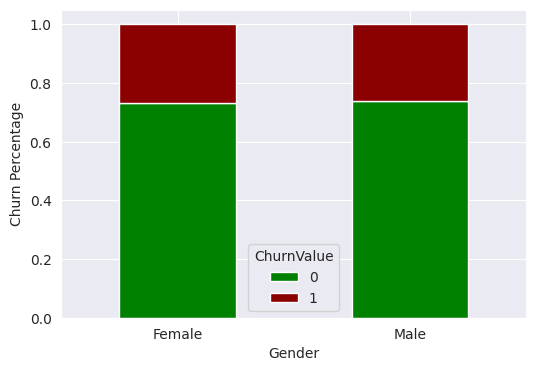

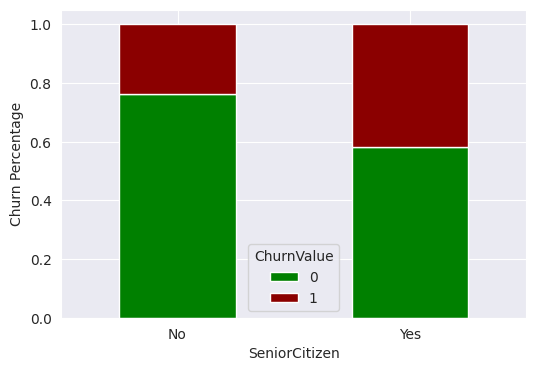

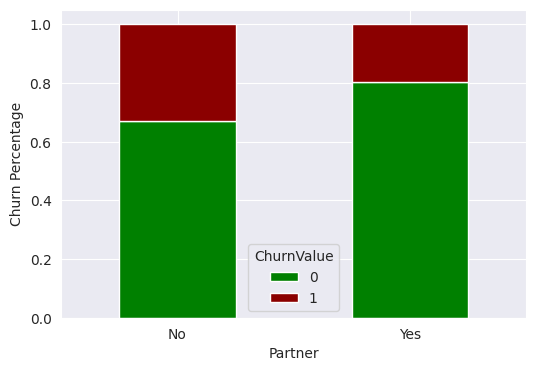

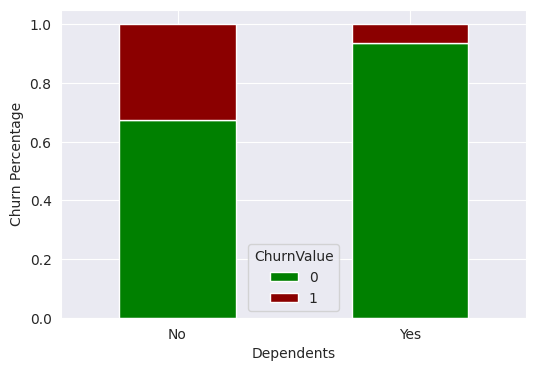

In [182]:
stacked_plot(df, "Gender", "ChurnValue")
stacked_plot(df, "SeniorCitizen", "ChurnValue")
stacked_plot(df, "Partner", "ChurnValue")
stacked_plot(df, "Dependents", "ChurnValue")

From above plots, we can say following:
- Gender alone does not help us predict the customer churn.
- If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

In [183]:
df[(df.SeniorCitizen == 'No') & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].ChurnValue.value_counts()

,count
ChurnValue,
0,1214
1,49


In [184]:
df[(df.SeniorCitizen == 'No') & (df.Partner == 'Yes') & (df.Dependents == 'No')].ChurnValue.value_counts()

,count
ChurnValue,
0,1144
1,422


In [185]:
df[(df.SeniorCitizen == 'No') & (df.Partner == 'No') & (df.Dependents == 'Yes')].ChurnValue.value_counts()

,count
ChurnValue,
0,246
1,45


In [186]:
df[(df.SeniorCitizen == 'No') & (df.Partner == 'No') & (df.Dependents == 'No')].ChurnValue.value_counts()

,count
ChurnValue,
0,1904
1,877


### Tenure

In [187]:
df['TenureMonths'].describe()

,TenureMonths
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [188]:
df['TenureMonths'].value_counts().head(10)

,count
TenureMonths,
1,613
72,362
2,238
3,200
4,176
71,170
5,133
7,131
8,123


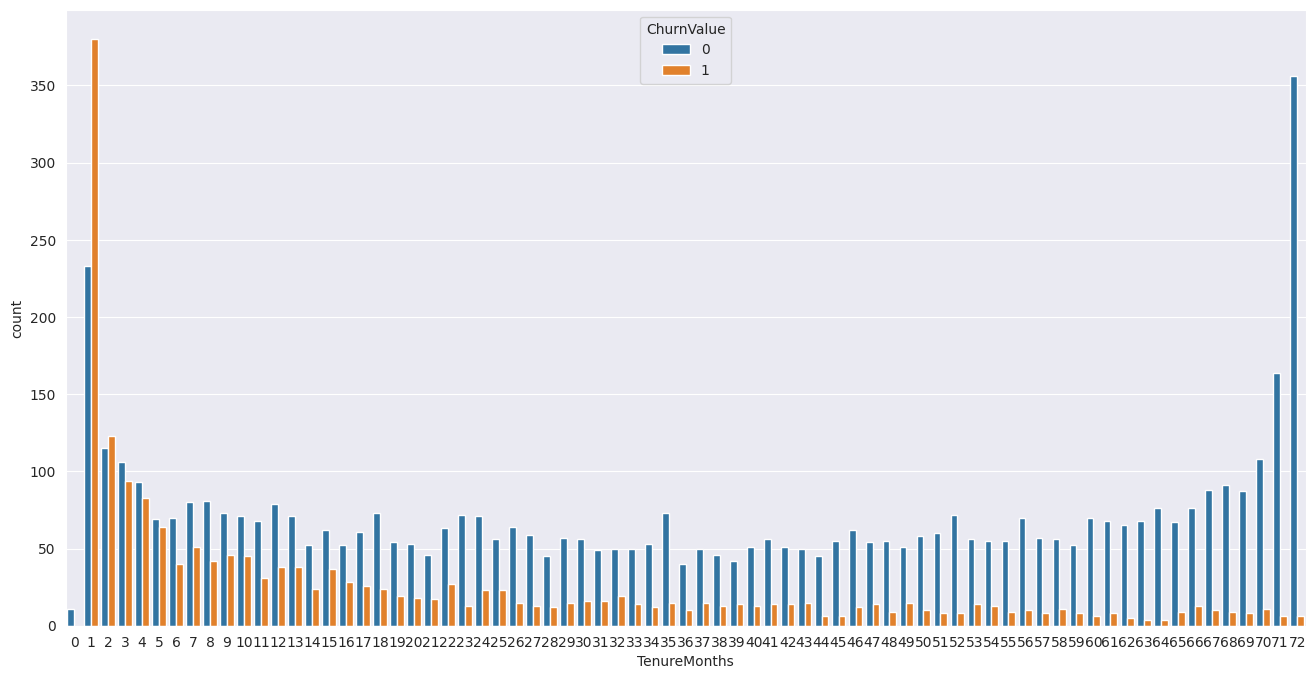

In [189]:
plt.figure(figsize=(16,8))
sns.countplot(x="TenureMonths", hue="ChurnValue", data=df)
plt.show()

As we can see the higher the tenure, the lesser the churn rate. This tells us that the customer becomes loyal with the tenure.

Converting into 5 groups to reduce model complexity.

In [190]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["TenureMonths"].apply(lambda x: tenure(x))

In [191]:
df["tenure_group"].value_counts()

,count
tenure_group,
1,2186
6,1407
2,1024
3,832
5,832
4,762


<Axes: xlabel='tenure_group', ylabel='count'>

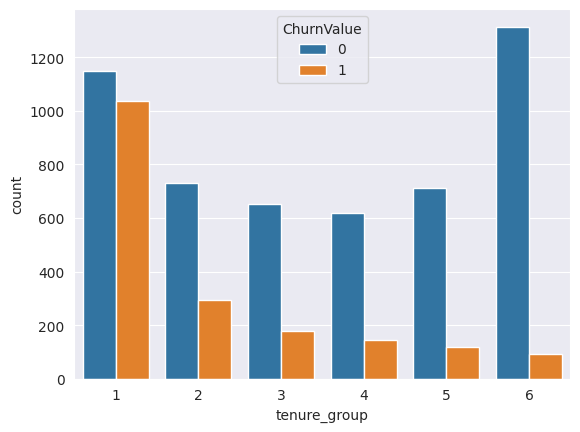

In [192]:
sns.countplot(x="tenure_group", hue="ChurnValue", data=df)

### Phone Service and MultipleLines

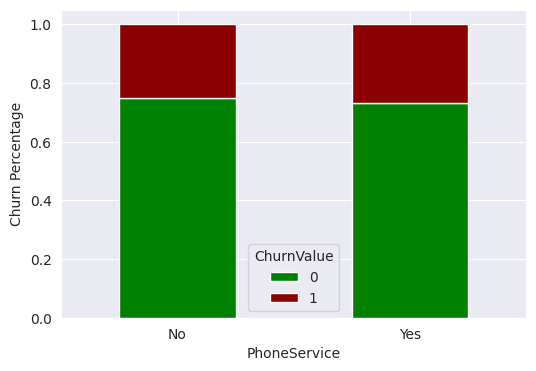

In [193]:
stacked_plot(df, "PhoneService", "ChurnValue")

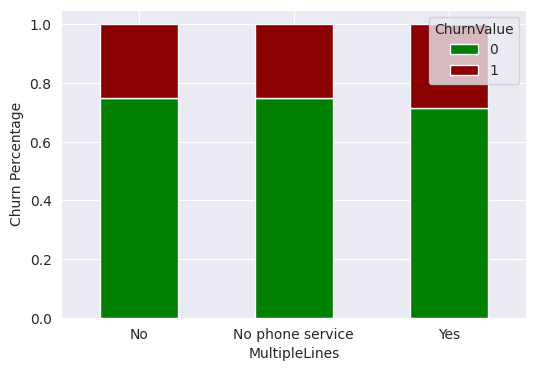

In [194]:
stacked_plot(df, "MultipleLines", "ChurnValue")

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

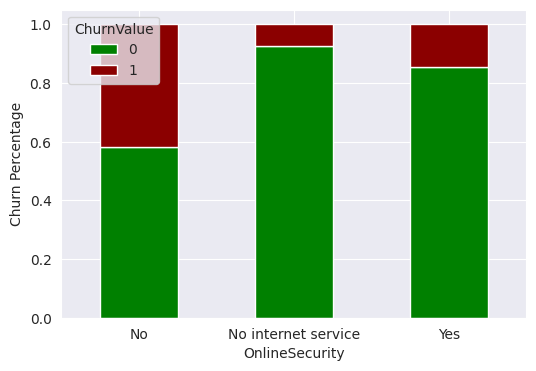

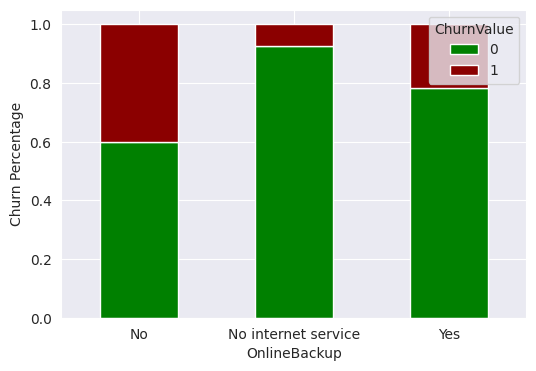

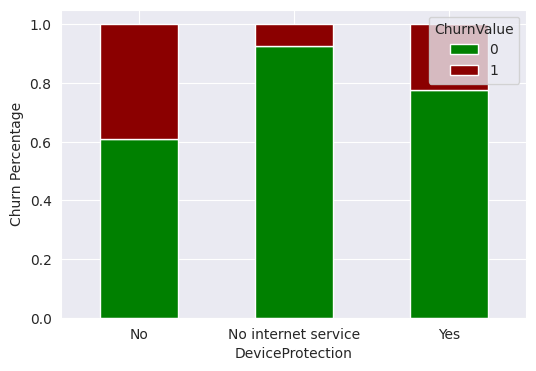

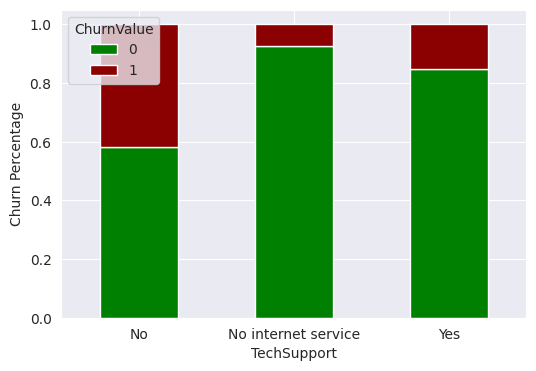

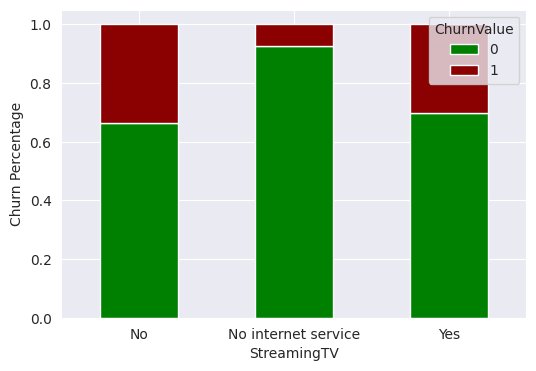

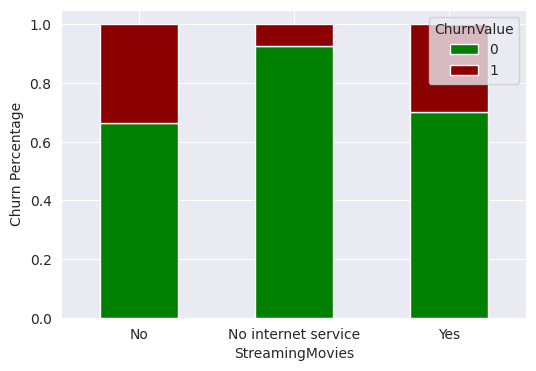

In [195]:
stacked_plot(df, "OnlineSecurity", "ChurnValue")
stacked_plot(df, "OnlineBackup", "ChurnValue")
stacked_plot(df, "DeviceProtection", "ChurnValue")
stacked_plot(df, "TechSupport", "ChurnValue")
stacked_plot(df, "StreamingTV", "ChurnValue")
stacked_plot(df, "StreamingMovies", "ChurnValue")

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

<ipython-input-196-53670f7f4309>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-196-53670f7f4309>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.OnlineSecurity == "Yes"], hist_

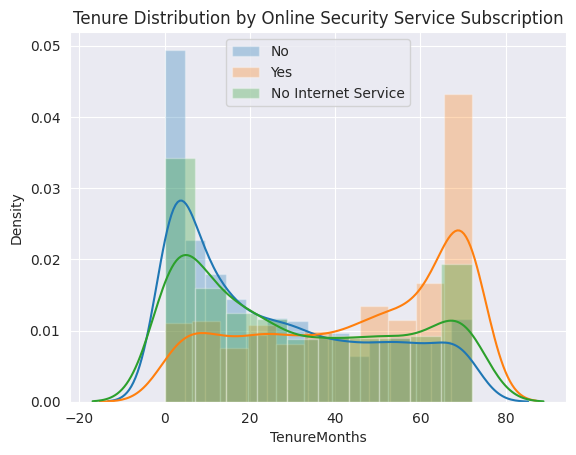

In [196]:
sns.distplot(df.TenureMonths[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.TenureMonths[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.TenureMonths[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

<ipython-input-197-809a94b76765>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-197-809a94b76765>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.StreamingTV == "Yes"], hist_kws=di

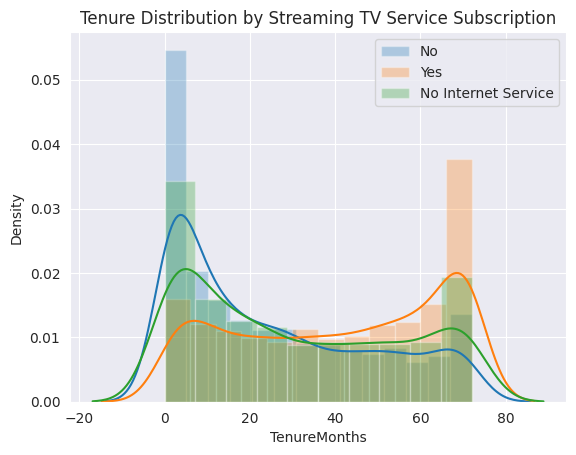

In [197]:
sns.distplot(df.TenureMonths[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.TenureMonths[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.TenureMonths[df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

<ipython-input-198-647626389e6f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-198-647626389e6f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.StreamingMovies == "Yes"], his

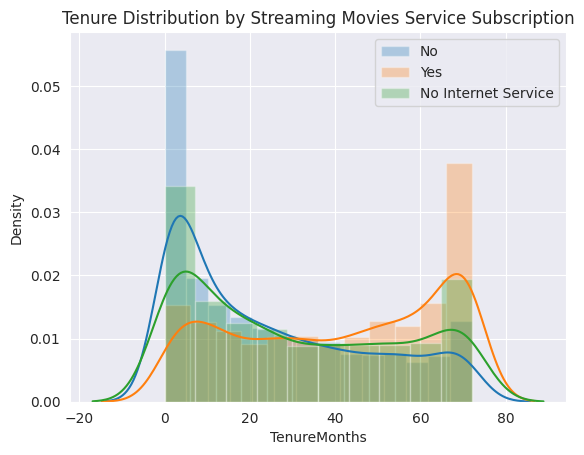

In [198]:
sns.distplot(df.TenureMonths[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.TenureMonths[df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.TenureMonths[df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

As we can see, when the customers are new they do not opt for various services and their churning rate is very high.

### InternetService

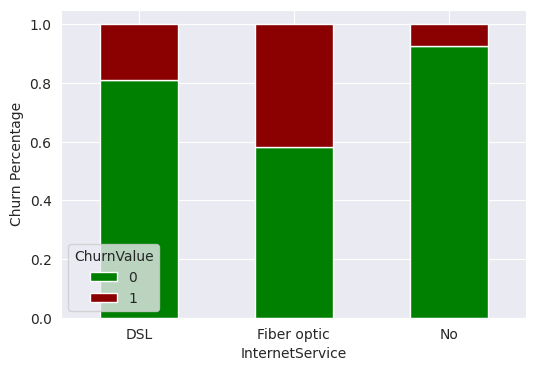

In [199]:
stacked_plot(df, "InternetService", "ChurnValue")

When the internet service is Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

<Axes: xlabel='InternetService', ylabel='count'>

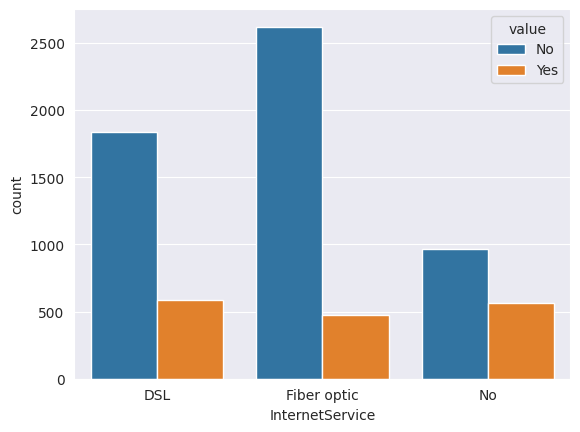

In [200]:
# Melt the DataFrame to convert it to long-form
df_melted = pd.melt(df, id_vars=['InternetService'], value_vars=['Dependents'])

# Create the countplot with the melted DataFrame
sns.countplot(x='InternetService', hue='value', data=df_melted)

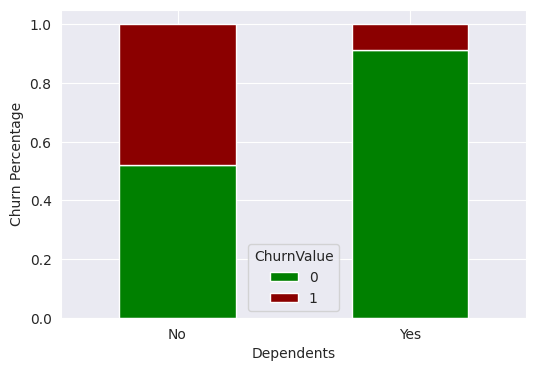

In [201]:
stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "ChurnValue")

Mostly people without dependents go for fiber optic option as Internnet Service and their churning percentage is high.

<Axes: xlabel='InternetService', ylabel='count'>

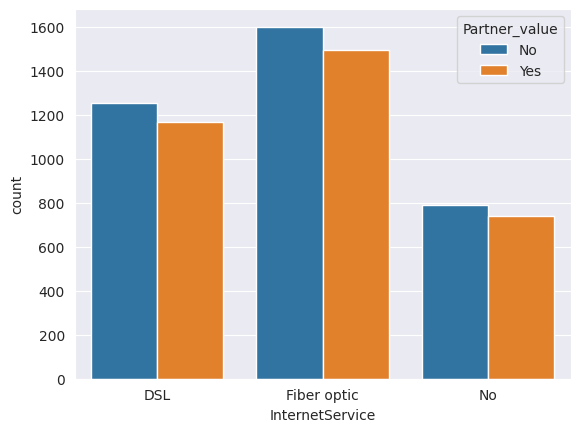

In [202]:
# Reshape the DataFrame to long-form
df_long = pd.melt(df, id_vars=['InternetService'], value_vars=['Partner'], var_name='Partner_col', value_name='Partner_value')

# Create the countplot with 'hue'
sns.countplot(x='InternetService', hue='Partner_value', data=df_long)

<Axes: xlabel='InternetService', ylabel='count'>

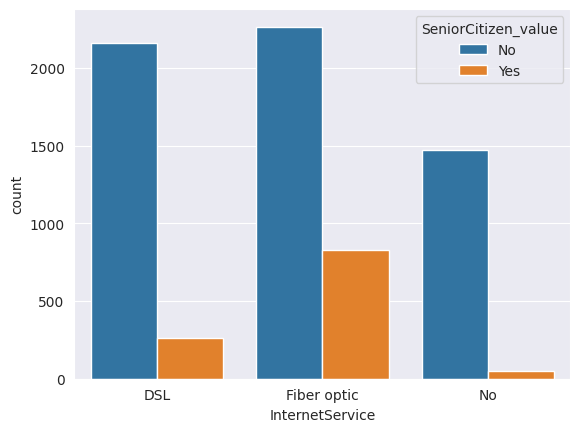

In [203]:
# Melt the DataFrame to have 'SeniorCitizen' as a separate column
df_melted = pd.melt(df, id_vars=['InternetService'], value_vars=['SeniorCitizen'], var_name='SeniorCitizen_col', value_name='SeniorCitizen_value')

# Create the countplot using the melted DataFrame
sns.countplot(x='InternetService', hue='SeniorCitizen_value', data=df_melted)

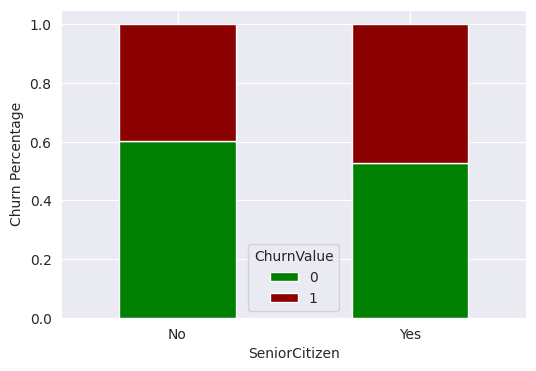

In [204]:
stacked_plot(df[df.InternetService == "Fiber optic"], "SeniorCitizen", "ChurnValue")

As we can see, Partner and Senior Citizen do not tell us anything about why fiber optics have higher churning rate.

<ipython-input-205-66b86595302f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-205-66b86595302f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.TenureMonths[df.InternetService == "DSL"], his

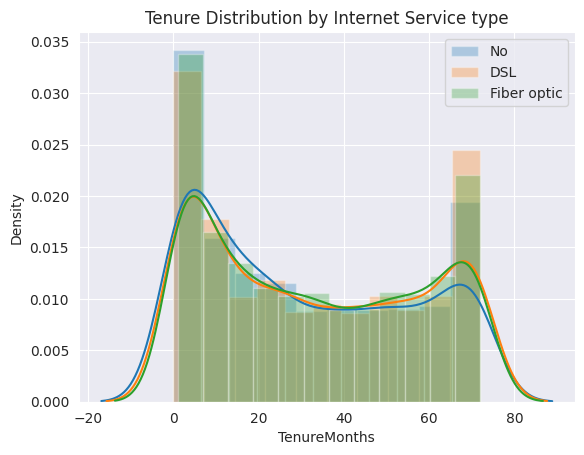

In [205]:
sns.distplot(df.TenureMonths[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.TenureMonths[df.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df.TenureMonths[df.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Also, the tenure distribution of customers with different internet service is similar.

In [206]:
df[df.InternetService == 'No'].head()

,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,tenure_group
7,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,...,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer,1
22,1,United States,California,Inglewood,90301,"33.956445, -118.358634",33.956445,-118.358634,Male,No,...,No,Mailed check,21.05,113.85,Yes,1,66,2604,Network reliability,1
65,1,United States,California,Ontario,91762,"34.057256, -117.667677",34.057256,-117.667677,Male,No,...,No,Mailed check,19.35,1099.6,Yes,1,83,5084,Price too high,5
99,1,United States,California,Indian Wells,92210,"33.537646, -116.291089",33.537646,-116.291089,Male,Yes,...,No,Mailed check,19.95,214.75,Yes,1,80,5888,Limited range of services,1
103,1,United States,California,Niland,92257,"33.345825, -115.596574",33.345825,-115.596574,Female,No,...,Yes,Mailed check,19.90,19.9,Yes,1,92,3351,Price too high,1


In [207]:
df[df.InternetService == 'No'].OnlineSecurity.value_counts()

,count
OnlineSecurity,
No internet service,1526


In [208]:
df[df.InternetService == 'No'].OnlineBackup.value_counts()

,count
OnlineBackup,
No internet service,1526


In [209]:
df[df.InternetService == 'No'].DeviceProtection.value_counts()

,count
DeviceProtection,
No internet service,1526


In [210]:
df[df.InternetService == 'No'].TechSupport.value_counts()

,count
TechSupport,
No internet service,1526


In [211]:
df[df.InternetService == 'No'].StreamingMovies.value_counts()

,count
StreamingMovies,
No internet service,1526


In [212]:
df[df.InternetService == 'No'].StreamingTV.value_counts()

,count
StreamingTV,
No internet service,1526


We need to encode these variables to remove dependancy in the model.

### Contract

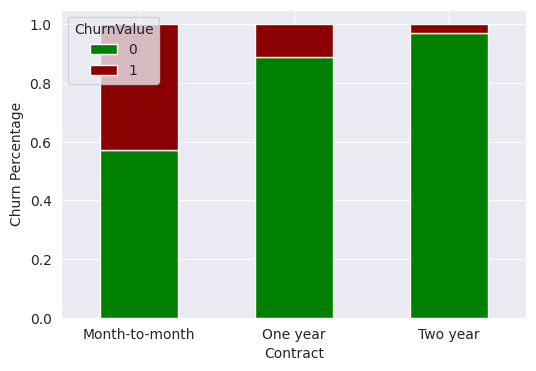

In [213]:
stacked_plot(df, "Contract", "ChurnValue")

In the case of Month-to-month contract Churn rate is very high. There is also a posibility of having customers in the dataframe who are still in their two-year or one-year contract plan.

<Axes: xlabel='InternetService', ylabel='count'>

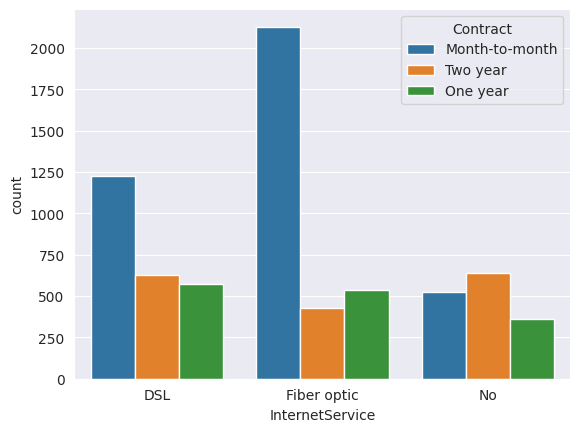

In [214]:
sns.countplot(x='InternetService', hue = 'Contract',data=df)

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

### PaymentMethod

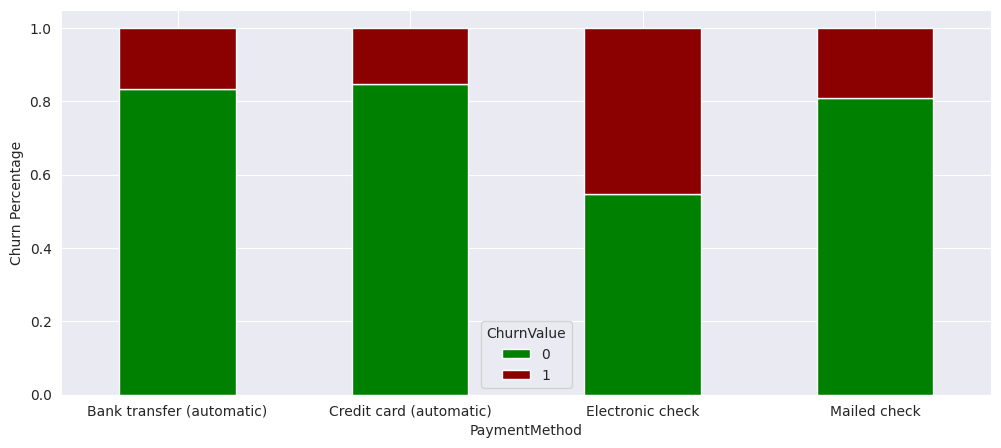

In [215]:
group = "PaymentMethod"
target = "ChurnValue"
fig, ax = plt.subplots(figsize = (12,5))
temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "darkred"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage');

In the case of Electronic check, churn is very high.

<Axes: xlabel='PaymentMethod', ylabel='count'>

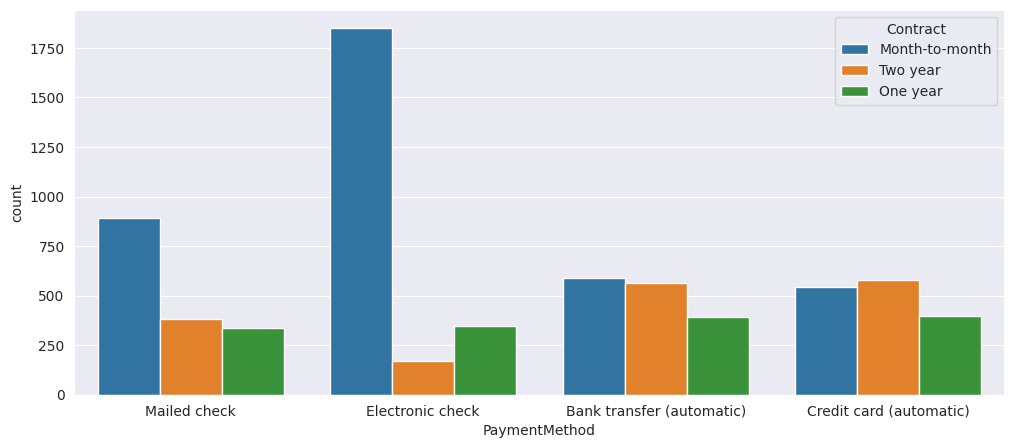

In [216]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x='PaymentMethod', hue = 'Contract',data=df ,ax = ax)

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

### PaperlessBilling

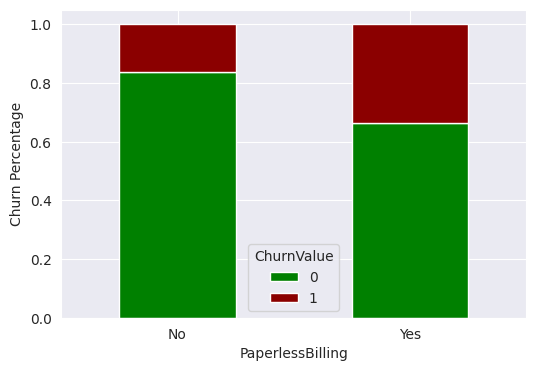

In [217]:
stacked_plot(df, "PaperlessBilling", "ChurnValue")

### TotalCharges

In [218]:
df.TotalCharges.describe()

,TotalCharges
count,7043.0
unique,6531.0
top,20.2
freq,11.0


In [219]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df['TotalCharges'].isna().sum()

<ipython-input-219-7fa1e9d624ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)


11

In [220]:
df[df["TotalCharges"].isnull()]

,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason,tenure_group
2234,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,...,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN,1
2438,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,...,No,Mailed check,20.25,NaN,No,0,68,5504,NaN,1
2568,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,...,No,Mailed check,80.85,NaN,No,0,45,2048,NaN,1
2667,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,...,No,Mailed check,25.75,NaN,No,0,48,4950,NaN,1
2856,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,...,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN,1
4331,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,...,No,Mailed check,19.85,NaN,No,0,53,2019,NaN,1
4687,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,...,No,Mailed check,25.35,NaN,No,0,49,2299,NaN,1
5104,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,...,No,Mailed check,20.00,NaN,No,0,27,3763,NaN,1
5719,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,...,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN,1
6772,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,...,No,Mailed check,73.35,NaN,No,0,44,2342,NaN,1


All the customers having tenure = 0 have null total charges which means that these customers recently joined and we can fill those missing values as 0.

In [221]:
df.loc[df["TotalCharges"].isnull(), 'TotalCharges'] = 0
df.isnull().any().any()

True

In [254]:
df['TotalCharges'] = df["TotalCharges"].astype(float)

Churn = df[df.ChurnValue==1]
Not_Churn = df[df.ChurnValue==0]

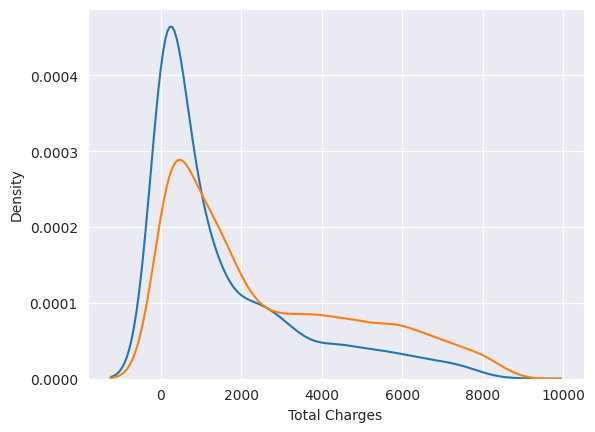

In [248]:
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges");

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.

### Monthly Charges

In [249]:
df.MonthlyCharges.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [250]:
df.MonthlyCharges.isna().sum()

0

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

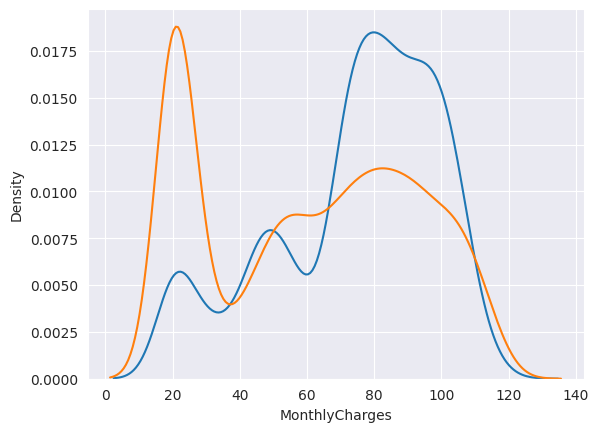

In [251]:
sns.kdeplot(Churn["MonthlyCharges"], label = "Churn")
sns.kdeplot(Not_Churn["MonthlyCharges"], label = "Not Churn")

The customers paying high monthly fees churn more.

Let's see the correlation of total charges and (monthly charges x tenure) to check if we have redundant information.

In [252]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.TenureMonths)

array([[1.        , 0.99956055],
       [0.99956055, 1.        ]])

Let's keep total charges as it shows the interaction between tenure and monthly charges

## Fucntion to prepare data for model building based on EDA

In [253]:
def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)

    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df